In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load data
X_1 = np.loadtxt('class1_train.txt')
X_2 = np.loadtxt('class2_train.txt')
X_3 = np.loadtxt('class3_train.txt')
X_4 = np.loadtxt('class4_train.txt')
X_1_val = np.loadtxt('class1_val.txt')
X_2_val = np.loadtxt('class2_val.txt')
X_3_val = np.loadtxt('class3_val.txt')
X_4_val = np.loadtxt('class4_val.txt')
X_1_test = np.loadtxt('class1_test.txt')
X_2_test = np.loadtxt('class2_test.txt')
X_3_test = np.loadtxt('class3_test.txt')
X_4_test = np.loadtxt('class4_test.txt')

Text(0, 0.5, 'X2')

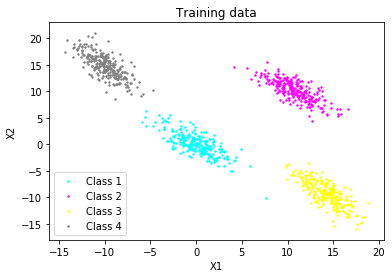

In [3]:
# simply visualising data
C1plt = plt.scatter(X_1[:, 0], X_1[:, 1], color = 'cyan', s = 2)
C2plt = plt.scatter(X_2[:, 0], X_2[:, 1], color = 'magenta', s = 2)
C3plt = plt.scatter(X_3[:, 0], X_3[:, 1], color = 'yellow', s = 2)
C4plt = plt.scatter(X_4[:, 0], X_4[:, 1], color = 'grey', s = 2)
plt.legend((C1plt, C2plt, C3plt, C4plt), ('Class 1', 'Class 2', 'Class 3', 'Class 4'))
plt.title('Training data')
plt.xlabel('X1')
plt.ylabel('X2')

In [4]:
# Gradient Descent function
def p(X, W):
    return 1/(1+np.exp(-np.dot(X, W)))
def loss(X_1, X_2, W):
    return -(np.sum(np.log(p(X_1, W)))+np.sum(np.log(1-p(X_2, W))))
def GD(X_1, X_2, alpha = 0.01, epochs = 10, verbose = False):
    W = np.random.randn(X_1.shape[1])
    if verbose:
        print('Epoch: ', 0, ' Loss: ', loss(X_1, X_2, W))
    for epoch in range(1, epochs+1):
        for x in X_1:
            w = W+alpha*np.dot(p(x, W)-1, x)
        for x in X_2:
            w = W+alpha*np.dot(p(x, W), x)
        W = W-alpha*(np.dot(p(X_1, W)-1, X_1)+np.dot(p(X_2, W), X_2))
        if verbose:
            print('Epoch: ', epoch, ' Loss: ', loss(X_1, X_2, W))
    return W

In [6]:
# finding logistic parameters
X_1_aug = np.ones((X_1.shape[0], 3))
X_1_aug[:, 1:3] = X_1
X_2_aug = np.ones((X_2.shape[0], 3))
X_2_aug[:, 1:3] = X_2
X_3_aug = np.ones((X_3.shape[0], 3))
X_3_aug[:, 1:3] = X_3
X_4_aug = np.ones((X_4.shape[0], 3))
X_4_aug[:, 1:3] = X_4
X_1_test_aug = np.ones((X_1_test.shape[0], 3))
X_1_test_aug[:, 1:3] = X_1_test
X_2_test_aug = np.ones((X_2_test.shape[0], 3))
X_2_test_aug[:, 1:3] = X_2_test
X_3_test_aug = np.ones((X_3_test.shape[0], 3))
X_3_test_aug[:, 1:3] = X_3_test
X_4_test_aug = np.ones((X_4_test.shape[0], 3))
X_4_test_aug[:, 1:3] = X_4_test

# class 1 vs 2
alpha = 0.01
W = {}
W[(1, 2)] = GD(X_1_aug, X_2_aug, epochs = 100)

# class 1 vs 3
alpha = 0.01
W[(1, 3)] = GD(X_1_aug, X_3_aug, epochs = 100)

# class 1 vs 4
alpha = 0.01
W[(1, 4)] = GD(X_1_aug, X_4_aug, epochs = 100)

# class 2 vs 3
alpha = 0.01
W[(2, 3)] = GD(X_2_aug, X_3_aug, epochs = 100)


# class 2 vs 4
alpha = 0.01
W[(2, 4)] = GD(X_2_aug, X_4_aug, epochs = 100)


# class 3 vs 4
alpha = 0.01
W[(3, 4)] = GD(X_3_aug, X_4_aug, epochs = 100)

/home/shashi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Logistic model based on voting
def predict(x):
    votes = [0, 0, 0, 0, 0]
    for i in range(1, 4):
        for j in range(i+1,5):
            if np.dot(W[(i, j)], x) >= 0:
                votes[i] = votes[i]+1
            else:
                votes[j] = votes[j]+1
    return np.argmax(votes)-1

In [8]:
# confusion matrix
# rows: predicted classes, columns: true classes
ConfusionMatrix = np.zeros((4, 4))
X = [X_1_test_aug, X_2_test_aug, X_3_test_aug, X_4_test_aug]
for i in range(4):
    for x in X[i]:
        ConfusionMatrix[predict(x), i] = ConfusionMatrix[predict(x), i]+1
pd.DataFrame(ConfusionMatrix, ['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'],['True 1', 'True 2', 'True 3', 'True 4'])

,True 1,True 2,True 3,True 4
Predicted 1,100.0,0.0,0.0,0.0
Predicted 2,0.0,100.0,0.0,0.0
Predicted 3,0.0,0.0,100.0,0.0
Predicted 4,0.0,0.0,0.0,100.0


In [9]:
# performance measures
N = np.sum(ConfusionMatrix, axis = 0)
TP = np.diagonal(ConfusionMatrix)
TN = np.sum(TP)-TP
FP = np.sum(ConfusionMatrix, axis = 1)-TP
FN = np.sum(ConfusionMatrix, axis = 0)-TP
Accuracy = 100*TP/N
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_measure = 2*Precision*Recall/(Precision+Recall)
print({
    'Accuracy: ': Accuracy.tolist(),
    'Mean Accuracy': np.mean(Accuracy)
})
print({
    'Precision: ': Precision.tolist(),
    'Mean Precision': np.mean(Precision)
})
print({
    'Recall: ': Recall.tolist(),
    'Mean Recall': np.mean(Recall)
})
print({
    'F_measure: ': F_measure.tolist(),
    'Mean F_measure': np.mean(F_measure)
})

{'Accuracy: ': [100.0, 100.0, 100.0, 100.0], 'Mean Accuracy': 100.0}
{'Precision: ': [1.0, 1.0, 1.0, 1.0], 'Mean Precision': 1.0}
{'Recall: ': [1.0, 1.0, 1.0, 1.0], 'Mean Recall': 1.0}
{'F_measure: ': [1.0, 1.0, 1.0, 1.0], 'Mean F_measure': 1.0}


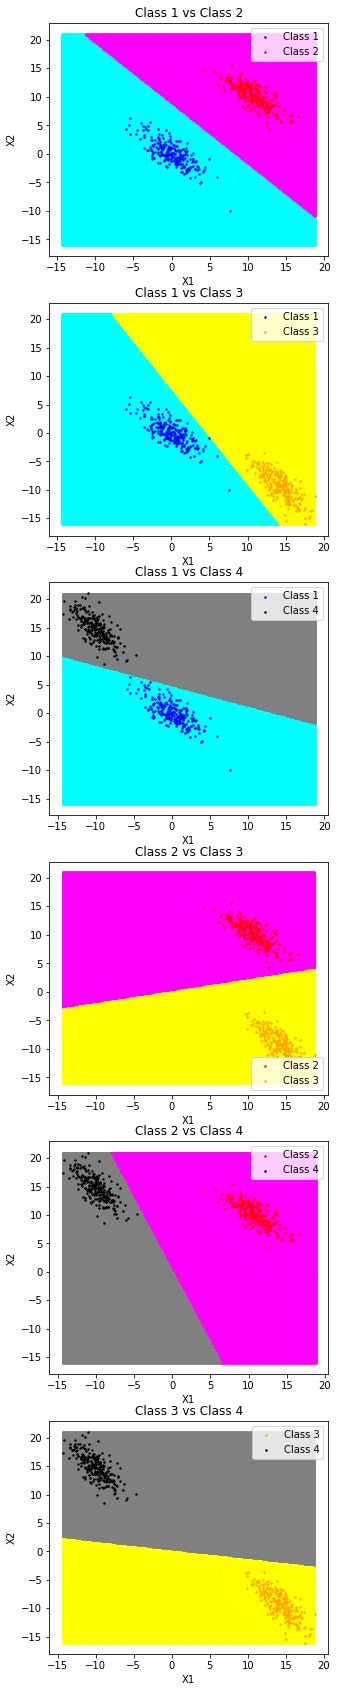

In [10]:
# decision region plot for every pair of classes with the respective training data superimposed
Nclasses = 4
Nfigures = (Nclasses)*(Nclasses-1)//2
plt.rcParams['figure.figsize'] = [5, 5*Nfigures]
fig, axs = plt.subplots(Nfigures, 1)

x_min = min([min(X_1[:, 0]), min(X_2[:, 0]), min(X_3[:, 0]), min(X_4[:, 0])])
y_min = min([min(X_1[:, 1]), min(X_2[:, 1]), min(X_3[:, 1]), min(X_4[:, 1])])
x_max = max([max(X_1[:, 0]), max(X_2[:, 0]), max(X_3[:, 0]), max(X_4[:, 0])])
y_max = max([max(X_1[:, 1]), max(X_2[:, 1]), max(X_3[:, 1]), max(X_4[:, 1])])

bg = ['cyan', 'magenta', 'yellow', 'grey']
fc = ['blue', 'red', 'orange', 'black']
X = [X_1, X_2, X_3, X_4]

i = 0
for c1 in range(1, Nclasses+1):
    for c2 in range(c1+1, Nclasses+1):
        x_1 = []
        x_2 = []
        for x in np.arange(x_min, x_max, 0.1):
            for y in np.arange(y_min, y_max, 0.1):
                c = np.dot(W[(c1, c2)], [1, x, y]) >= 0
                if c == True:
                    x_1.append([x, y])
                elif c == False:
                    x_2.append([x, y])
        x_1 = np.array(x_1)
        x_2 = np.array(x_2)
        axs[i].scatter(x_1[:, 0], x_1[:, 1], color = bg[c1-1], s = 2)
        axs[i].scatter(x_2[:, 0], x_2[:, 1], color = bg[c2-1], s = 2)
        C1plt = axs[i].scatter(X[c1-1][:, 0], X[c1-1][:, 1], color = fc[c1-1], s = 2)
        C2plt = axs[i].scatter(X[c2-1][:, 0], X[c2-1][:, 1], color = fc[c2-1], s = 2)
        axs[i].set_title('Class '+str(c1)+' vs Class '+str(c2))
        axs[i].set_xlabel('X1')
        axs[i].set_ylabel('X2')
        axs[i].legend((C1plt, C2plt), ('Class '+str(c1), 'Class '+str(c2)))
        i = i+1

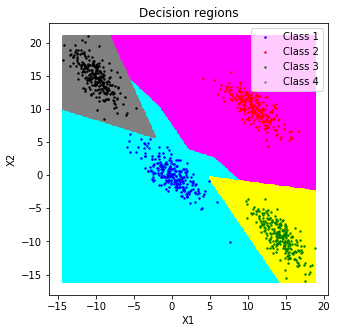

In [11]:
# Decision region plot for all the classes together with the training data superposed
plt.rcParams['figure.figsize'] = [5, 5]
x_1 = []
x_2 = []
x_3 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = predict([1, x, y])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
        elif c == 2:
            x_3.append([x, y])
        else:
            x_4.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
x_4 = np.array(x_4)
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 4)
plt.scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 4)
plt.scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 4)
plt.scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 4)
C1plt = plt.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
C2plt = plt.scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
C3plt = plt.scatter(X_3[:, 0], X_3[:, 1], color = 'green', s = 2)
c4plt = plt.scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)
plt.title('Decision regions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend((C1plt, C2plt, C3plt, C4plt), ('Class 1', 'Class 2', 'Class 3', 'Class 4'))